# Survival Analysis
## Publication Data

We begin by importing some of our libraries at this top level. This makes the code more readable, as scanning the first few lines of the notebook tell us what libraries are used in this notebook.

In [1]:
from matplotlib.pyplot import subplots
import numpy as np
import pandas as pd
from ISLP.models import ModelSpec as MS
from ISLP import load_data

We also collect the new imports needed for this lab.

In [2]:
from lifelines import \
     (KaplanMeierFitter,
      CoxPHFitter)
from lifelines.statistics import \
     (logrank_test,
      multivariate_logrank_test)
from ISLP.survival import sim_time

The ``Publication`` data presented in Section 11.5.4 can be found in the ``ISLP`` package. We first reproduce Figure 11.5 by plotting the Kaplan-Meier curves stratified on the ``posres`` variable, which records whether the study had a positive or negative result.

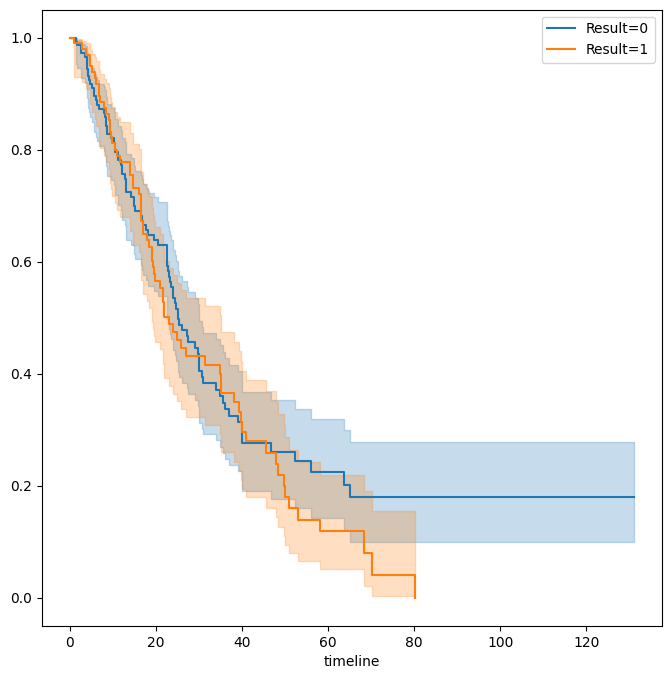

In [9]:
fig, ax = subplots(figsize=(8,8))
km = KaplanMeierFitter()
Publication = load_data('Publication')
by_result = {}
for result, df in Publication.groupby('posres'):
    by_result[result] = df
    km_result = km.fit(df['time'], df['status'])
    km_result.plot(label='Result=%d' % result, ax=ax)

As discussed previously, the $p$-values from fitting Cox’s proportional hazards model to the ``posres`` variable are quite large, providing no evidence of a difference in time-to-publication between studies with positive versus negative results.

In [10]:
coxph = CoxPHFitter # shorthand
posres_df = MS(['posres',
                'time',
                'status'],
                intercept=False).fit_transform(Publication)
posres_fit = coxph().fit(posres_df,
                         'time',
                         'status')
posres_fit.summary[['coef', 'se(coef)', 'p']]

,coef,se(coef),p
covariate,,,
posres,0.148076,0.161625,0.359579


However, the results change dramatically when we include other predictors in the model. Here we exclude the funding mechanism variable.

In [8]:
model = MS(Publication.columns.drop('mech'),
           intercept=False)
coxph().fit(model.fit_transform(Publication),
            'time',
            'status').summary[['coef', 'se(coef)', 'p']]

,coef,se(coef),p
covariate,,,
posres,0.570773,0.175960,1.179610e-03
multi,-0.040860,0.251194,8.707842e-01
clinend,0.546183,0.262000,3.709944e-02
sampsize,0.000005,0.000015,7.507005e-01
budget,0.004386,0.002465,7.515984e-02
impact,0.058318,0.006676,2.426306e-18


We see that there are a number of statistically significant variables, including whether the trial focused on a clinical endpoint, the impact of the study, and whether the study had positive or negative results.